# Summary scores and comparasion

In [1]:
import pandas as pd
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_csv('news_with_pegasus_summary', index_col=0)
df.head()

,category,url,title,summary,full_text,extracted_summary,pegasus_summary
0,Culture,/britney-spears-calls-dad-bastd-kiss-gdamn-174...,"Britney Spears Calls Dad a 'Bast**d,' Tells Hi...",Fans expressed support and worry about the pop...,Fans of Britney Spears have long watched her e...,"""Comments from followers on Sunday night's pos...",Pop star Britney Spears has posted an angry In...
1,Culture,/sister-wives-season-17-new-kody-brown-christi...,'Sister Wives' Season 17: Why Did Christine an...,"Season 17 of ""Sister Wives"" is set to follow t...",Kody Brown's split from Christine is set to be...,"ET. ""Sister Wives is set to return to TLC for ...",One of the stars of US reality TV show Sister ...
2,Culture,/house-dragon-emily-carey-interview-scared-sex...,Emily Carey Talks Being 'Scared' of 'House of ...,"""House of the Dragon"" star Emily Carey spoke t...","Emily Carey was ""scared"" of doing sex scenes i...","ET. ""I've never seen Game of Thrones before, a...",One of the stars of the new Game of Thrones sp...
3,World,/cold-hunger-darkness-ukraine-not-terrible-rus...,"Cold, Hunger and Darkness in Ukraine 'Not as T...","Zelensky said Sunday's ""terrorist acts"" were d...",Ukraine President Volodymyr Zelensky addressed...,"That includes Ukrainian civilians, foreign fig...","Ukraine's president has accused Russia of ""del..."
4,Culture,/american-gigolo-based-true-story-jon-bernthal...,Is 'American Gigolo' Based on a True Story?,"""American Gigolo"" sees Jon Bernthal play male ...","Showtime's new series, American Gigolo, sees J...","ET. ""American Gigolo premieres Sunday, Septemb...",A new TV series about a man who is wrongly acc...


In [3]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score(str(df['full_text'].iloc[0]), str(df['pegasus_summary'].iloc[0]))
scores

{'rouge1': Score(precision=1.0, recall=0.025295109612141653, fmeasure=0.049342105263157895),
 'rougeL': Score(precision=0.8, recall=0.02023608768971332, fmeasure=0.039473684210526314)}

In [4]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(str(df['full_text'].iloc[0]), str(df['pegasus_summary'].iloc[0]))
scores

{'rouge1': Score(precision=1.0, recall=0.025295109612141653, fmeasure=0.049342105263157895),
 'rouge2': Score(precision=0.42857142857142855, recall=0.010135135135135136, fmeasure=0.019801980198019802),
 'rougeL': Score(precision=0.8, recall=0.02023608768971332, fmeasure=0.039473684210526314)}

In [5]:
def get_rouge_scores(df, col1, col2):
    rouge1, rouge2, rougeL = [], [], []
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    for i in range(len(df)):
        scores = scorer.score(str(df[col1].iloc[i]), str(df[col2].iloc[i]))
        rouge1.append(scores['rouge1'].fmeasure)
        rouge2.append(scores['rouge2'].fmeasure)
        rougeL.append(scores['rougeL'].fmeasure)
    return rouge1, rouge2, rougeL

In [6]:
rouge1, rouge2, rougeL = get_rouge_scores(df, 'summary', 'extracted_summary')

In [7]:
df['extract_rouge_1'] = rouge1
df['extract_rouge_2'] = rouge2
df['extract_rouge_L'] = rougeL
df.head()

,category,url,title,summary,full_text,extracted_summary,pegasus_summary,extract_rouge_1,extract_rouge_2,extract_rouge_L
0,Culture,/britney-spears-calls-dad-bastd-kiss-gdamn-174...,"Britney Spears Calls Dad a 'Bast**d,' Tells Hi...",Fans expressed support and worry about the pop...,Fans of Britney Spears have long watched her e...,"""Comments from followers on Sunday night's pos...",Pop star Britney Spears has posted an angry In...,0.133333,0.022472,0.066667
1,Culture,/sister-wives-season-17-new-kody-brown-christi...,'Sister Wives' Season 17: Why Did Christine an...,"Season 17 of ""Sister Wives"" is set to follow t...",Kody Brown's split from Christine is set to be...,"ET. ""Sister Wives is set to return to TLC for ...",One of the stars of US reality TV show Sister ...,0.311111,0.232558,0.222222
2,Culture,/house-dragon-emily-carey-interview-scared-sex...,Emily Carey Talks Being 'Scared' of 'House of ...,"""House of the Dragon"" star Emily Carey spoke t...","Emily Carey was ""scared"" of doing sex scenes i...","ET. ""I've never seen Game of Thrones before, a...",One of the stars of the new Game of Thrones sp...,0.166667,0.000000,0.138889
3,World,/cold-hunger-darkness-ukraine-not-terrible-rus...,"Cold, Hunger and Darkness in Ukraine 'Not as T...","Zelensky said Sunday's ""terrorist acts"" were d...",Ukraine President Volodymyr Zelensky addressed...,"That includes Ukrainian civilians, foreign fig...","Ukraine's president has accused Russia of ""del...",0.000000,0.000000,0.000000
4,Culture,/american-gigolo-based-true-story-jon-bernthal...,Is 'American Gigolo' Based on a True Story?,"""American Gigolo"" sees Jon Bernthal play male ...","Showtime's new series, American Gigolo, sees J...","ET. ""American Gigolo premieres Sunday, Septemb...",A new TV series about a man who is wrongly acc...,0.114286,0.060606,0.114286


In [8]:
rouge1, rouge2, rougeL = get_rouge_scores(df, 'summary', 'pegasus_summary')

In [9]:
df['pegasus_rouge_1'] = rouge1
df['pegasus_rouge_2'] = rouge2
df['pegasus_rouge_L'] = rougeL
df.head()

,category,url,title,summary,full_text,extracted_summary,pegasus_summary,extract_rouge_1,extract_rouge_2,extract_rouge_L,pegasus_rouge_1,pegasus_rouge_2,pegasus_rouge_L
0,Culture,/britney-spears-calls-dad-bastd-kiss-gdamn-174...,"Britney Spears Calls Dad a 'Bast**d,' Tells Hi...",Fans expressed support and worry about the pop...,Fans of Britney Spears have long watched her e...,"""Comments from followers on Sunday night's pos...",Pop star Britney Spears has posted an angry In...,0.133333,0.022472,0.066667,0.390244,0.102564,0.341463
1,Culture,/sister-wives-season-17-new-kody-brown-christi...,'Sister Wives' Season 17: Why Did Christine an...,"Season 17 of ""Sister Wives"" is set to follow t...",Kody Brown's split from Christine is set to be...,"ET. ""Sister Wives is set to return to TLC for ...",One of the stars of US reality TV show Sister ...,0.311111,0.232558,0.222222,0.318182,0.095238,0.227273
2,Culture,/house-dragon-emily-carey-interview-scared-sex...,Emily Carey Talks Being 'Scared' of 'House of ...,"""House of the Dragon"" star Emily Carey spoke t...","Emily Carey was ""scared"" of doing sex scenes i...","ET. ""I've never seen Game of Thrones before, a...",One of the stars of the new Game of Thrones sp...,0.166667,0.000000,0.138889,0.285714,0.127660,0.285714
3,World,/cold-hunger-darkness-ukraine-not-terrible-rus...,"Cold, Hunger and Darkness in Ukraine 'Not as T...","Zelensky said Sunday's ""terrorist acts"" were d...",Ukraine President Volodymyr Zelensky addressed...,"That includes Ukrainian civilians, foreign fig...","Ukraine's president has accused Russia of ""del...",0.000000,0.000000,0.000000,0.222222,0.000000,0.222222
4,Culture,/american-gigolo-based-true-story-jon-bernthal...,Is 'American Gigolo' Based on a True Story?,"""American Gigolo"" sees Jon Bernthal play male ...","Showtime's new series, American Gigolo, sees J...","ET. ""American Gigolo premieres Sunday, Septemb...",A new TV series about a man who is wrongly acc...,0.114286,0.060606,0.114286,0.190476,0.100000,0.190476


Sort the good summaries (those with a rouge score > 0.5)

In [10]:
good_extr_summ_df = df[(df['extract_rouge_1'] > 0.5) & (df['extract_rouge_2'] > 0.5) & (df['extract_rouge_L'] > 0.5)]
good_extr_summ_df

,category,url,title,summary,full_text,extracted_summary,pegasus_summary,extract_rouge_1,extract_rouge_2,extract_rouge_L,pegasus_rouge_1,pegasus_rouge_2,pegasus_rouge_L
48,World,/zelensky-says-harsh-winter-will-determine-fat...,Zelensky Says Harsh Winter Will Determine Fate...,"""We can make it so that after these 90 days th...",Russia began its war of aggression in Ukraine ...,Zelensky has vowed that Ukraine will take back...,Ukraine's president has called this winter the...,0.784314,0.693878,0.705882,0.054054,0.0,0.054054
89,News,/joshua-jones-american-killed-ukraine-war-russ...,American Killed in Ukraine Was Front-Line 'Tac...,"""Ukraine is better off for having him and wors...","Joshua Alan Jones, a 24-year-old Memphis nativ...","""Ukraine is better off for having him and wors...",A Tennessee soldier who was killed while fight...,0.638298,0.622222,0.638298,0.125000,0.0,0.083333
510,News,/john-fetterman-agrees-debate-mehmet-oz-after-...,John Fetterman Agrees to Debate Mehmet Oz Afte...,"""This whole thing has been about Dr. Oz and hi...","John Fetterman, the Democratic candidate for P...","""This whole thing has been about Dr. Oz and hi...",A Pennsylvania US Senate candidate has agreed ...,0.738462,0.698413,0.738462,0.085106,0.0,0.085106
727,U.S.,/hurricane-kay-path-tracker-california-mexico-...,"Hurricane Kay Path, Tracker as California, Mex...","""Kay is expected to produce rainfall totals of...",A tropical wave in the eastern Pacific Ocean i...,"However, it'll likely stay at a Cat 1 or downg...",A tropical wave in the eastern Pacific Ocean i...,0.555556,0.514286,0.555556,0.093023,0.0,0.093023
731,Family & Parenting,/woman-sending-family-portraits-ex-husbands-mo...,Woman Sending Family Portraits to Ex-Husband's...,"""Grandma needs to be in the next family portra...",Internet commenters commended one mother's gen...,"""Newsweek reached out to u/blatantlyridiculous...",All photographs subject to copyright.,0.689655,0.592593,0.620690,0.117647,0.0,0.117647
1336,Family & Parenting,/woman-backed-refusing-care-disabled-sister-fo...,Woman Backed for Refusing to Care For Disabled...,"""It is not your responsibility to step in for ...",A woman has been backed online after refusing ...,"[Not the a**hole]."" It is not your responsibil...",A woman has been backed online after refusing ...,0.775510,0.765957,0.775510,0.181818,0.0,0.136364


In [11]:
good_pegasus_summ_df = df[(df['pegasus_rouge_1'] > 0.5) & (df['pegasus_rouge_2'] > 0.5) & (df['pegasus_rouge_L'] > 0.5)]
good_pegasus_summ_df

,category,url,title,summary,full_text,extracted_summary,pegasus_summary,extract_rouge_1,extract_rouge_2,extract_rouge_L,pegasus_rouge_1,pegasus_rouge_2,pegasus_rouge_L
46,Opinion,/we-must-honor-lives-hispanics-latinos-lost-se...,We Must Honor the Lives of Hispanics and Latin...,As a Hispanic man reflecting on this sobering ...,"Sept. 11, 2001, is a date forever seared into ...",And we remain committed to making this nation ...,As the 11th anniversary of the 9/11 attacks ap...,0.160000,0.000000,0.120000,0.653061,0.510638,0.653061
119,News,/dan-rather-donald-trump-toddler-chief-egocent...,"Dan Rather Dubs Trump 'Toddler in Chief,' Call...",Veteran journalist Dan Rather said that Trump ...,Veteran broadcast journalist Dan Rather on Fri...,"""Newsweek reached out to Trump's office for co...","""He has exploited a business and social struct...",0.125000,0.000000,0.041667,0.809524,0.800000,0.809524
373,News,/what-happens-if-queen-elizabeth-dies-london-b...,What Happens Now the Queen Has Died? Operation...,Operation London Bridge is the watertight plan...,With the death of Queen Elizabeth II at the ag...,"""Shortly after the announcement concerning the...",With the death of Queen Elizabeth II at the ag...,0.122449,0.013793,0.068027,0.703704,0.615385,0.592593
609,News,/republicans-fear-blown-all-campaign-cash-midt...,Republicans Fear They've Blown All Their Campa...,The National Republican Senatorial Committee h...,Republican senators are reportedly concerned t...,The GOP had been favored to win in the same an...,The National Republican Senatorial Committee (...,0.118519,0.000000,0.074074,0.920000,0.833333,0.920000
649,News,/republicans-fear-blown-all-campaign-cash-midt...,Republicans Fear They've Blown All Their Campa...,The National Republican Senatorial Committee h...,Republican senators are reportedly concerned t...,The GOP had been favored to win in the same an...,The National Republican Senatorial Committee (...,0.118519,0.000000,0.074074,0.920000,0.833333,0.920000
1034,News,/trump-repeats-praise-smart-putin-touts-xis-ir...,"Trump Repeats Praise of 'Smart' Putin, Touts X...","""I got to know a lot of the foreign leaders an...",Former President Donald Trump renewed praise f...,"""Newsweek has reached out to Trump's press off...","""I got to know a lot of the foreign leaders an...",0.131148,0.000000,0.065574,0.830189,0.823529,0.830189
1354,News,/teen-fatally-shoots-stepfather-claims-he-was-...,"Teen Fatally Shoots Stepfather, Claims He Was ...","A sheriff said he has ""no reason to believe"" t...","A sheriff in Ohio said there is ""no reason to ...","""This is not only a case that is tragic, but a...","A sheriff in Ohio said there is ""no reason to ...",0.153846,0.000000,0.107692,0.709677,0.566667,0.709677
1449,News,/nba-coach-caron-butler-talks-release-novel-sh...,NBA Coach Caron Butler Talks About Release of ...,Caron Butler has co-authored the book—based on...,Being an exceptional athlete doesn't protect y...,There was only one Bill Russell.This story was...,Former NBA star Caron Butler has teamed up wit...,0.068966,0.000000,0.068966,0.686567,0.523077,0.626866


### Rouge-1 scores analysis

In [12]:
df['extract_rouge_1'].mean()

0.15102513918266935

In [13]:
df['pegasus_rouge_1'].mean()

0.17523021768543776

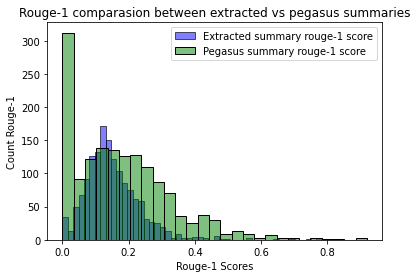

In [14]:
sns.histplot(data=df, x='extract_rouge_1', alpha=0.5, color='blue', label='Extracted summary rouge-1 score')
sns.histplot(data=df, x='pegasus_rouge_1', alpha=0.5, color='green', label='Pegasus summary rouge-1 score')
plt.xlabel('Rouge-1 Scores')
plt.ylabel('Count Rouge-1')
plt.legend()
plt.title('Rouge-1 comparasion between extracted vs pegasus summaries')
plt.show()

In [15]:
res = mannwhitneyu(df['extract_rouge_1'], df['pegasus_rouge_1'])
res.pvalue

0.006269179353558405

The pval is < 0.05, so we conclude that the two distributions are not the same.

### Rouge-2 scores analysis

In [16]:
df['extract_rouge_2'].mean()

0.027628699751135476

In [17]:
df['pegasus_rouge_2'].mean()

0.045775996690459765

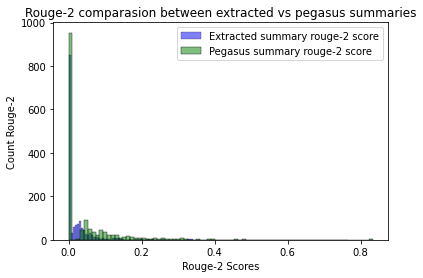

In [18]:
sns.histplot(data=df, x='extract_rouge_2', alpha=0.5, color='blue', label='Extracted summary rouge-2 score')
sns.histplot(data=df, x='pegasus_rouge_2', alpha=0.5, color='green', label='Pegasus summary rouge-2 score')
plt.xlabel('Rouge-2 Scores')
plt.ylabel('Count Rouge-2')
plt.legend()
plt.title('Rouge-2 comparasion between extracted vs pegasus summaries')
plt.show()

In [19]:
res = mannwhitneyu(df['extract_rouge_2'], df['pegasus_rouge_2'])
res.pvalue

0.15657198292615862

The pval is > 0.05, so we conclude that the two distributions are quite similar. (Mostly because there are a lot of summaries with a score of 0)

### Rouge-2 scores analysis

In [20]:
df['extract_rouge_L'].mean()

0.10809504316969133

In [21]:
df['pegasus_rouge_L'].mean()

0.13495642275570643

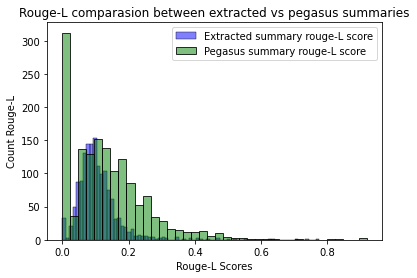

In [22]:
sns.histplot(data=df, x='extract_rouge_L', alpha=0.5, color='blue', label='Extracted summary rouge-L score')
sns.histplot(data=df, x='pegasus_rouge_L', alpha=0.5, color='green', label='Pegasus summary rouge-L score')
plt.xlabel('Rouge-L Scores')
plt.ylabel('Count Rouge-L')
plt.legend()
plt.title('Rouge-L comparasion between extracted vs pegasus summaries')
plt.show()

In [23]:
res = mannwhitneyu(df['extract_rouge_L'], df['pegasus_rouge_L'])
res.pvalue

1.1621720700247125e-08

The pval is < 0.05, so we conclude that the two distributions are not the same.